# Example save to disk

As you work on the scrapes, it isn't necessary to re-download the webpage every time you modify your code.
You could instead save the fetched html to your hard drive, and subsequently read it in from there.

The code cells below do this for the first task, where the NOAA hurricane data is scraped.

Once you have the html saved, you can simply not run the first code cell again, or comment it out.

In [1]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.nhc.noaa.gov/pastdec.shtml'
wx_page = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}) # Get the page.
soup = BeautifulSoup(wx_page.text, 'html.parser')

# Save the page to disk.
with open(r"C:\Users\tyj85\OneDrive\Desktop\UPenn\School\Stat 410\HW4\weather_page.html", "w", encoding='utf-8') as file:
    file.write(str(soup))   
# with open("C:\\Users\\water\\Dropbox (Penn)\\Teaching\\4100s2023\\Homeworks\\HW4\\wx.html", "w", encoding='utf-8') as file:
#     file.write(str(soup))    

In [4]:
import requests
from bs4 import BeautifulSoup
with open(r"C:\Users\tyj85\OneDrive\Desktop\UPenn\School\Stat 410\HW4\weather_page.html", 'r', encoding='utf-8') as f:
    contents = f.read()
    soup = BeautifulSoup(contents, 'html.parser')      

In [7]:
tab = soup.table # Get the first table tag.
print(type(tab)) 

<class 'bs4.element.Tag'>


In [85]:
import pandas as pd   
df = pd.read_html(str(soup.table))[0] # You have to cast the html table to type string.                                         
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Decade, Decade)               18 non-null     object 
 1   (Saffir-Simpson Category1, 1)  18 non-null     float64
 2   (Saffir-Simpson Category1, 2)  18 non-null     float64
 3   (Saffir-Simpson Category1, 3)  18 non-null     float64
 4   (Saffir-Simpson Category1, 4)  18 non-null     float64
 5   (Saffir-Simpson Category1, 5)  18 non-null     float64
 6   (All1,2,3,4,5, All1,2,3,4,5)   18 non-null     float64
 7   (Major3,4,5, Major3,4,5)       18 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.3+ KB
None


In [86]:
df = df[:-4]
# set the index to Decade column
df.set_index('Decade', inplace=True)

In [87]:
df

Saffir-Simpson Category1                     All1,2,3,4,5  \
                                    1    2    3    4    5 All1,2,3,4,5   
Decade                                                                   
(1851-1860,)                      8.0  5.0  5.0  1.0  0.0         19.0   
(1861-1870,)                      8.0  6.0  1.0  0.0  0.0         15.0   
(1871-1880,)                      7.0  6.0  7.0  0.0  0.0         20.0   
(1881-1890,)                      8.0  9.0  4.0  1.0  0.0         22.0   
(1891-1900,)                      8.0  5.0  5.0  3.0  0.0         21.0   
(1901-1910,)                     10.0  4.0  4.0  0.0  0.0         18.0   
(1911-1920,)                     10.0  4.0  4.0  3.0  0.0         21.0   
(1921-1930,)                      5.0  3.0  3.0  2.0  0.0         13.0   
(1931-1940,)                      4.0  7.0  6.0  1.0  1.0         19.0   
(1941-1950,)                      8.0  6.0  9.0  1.0  0.0         24.0   
(1951-1960,)                      8.0  1.0  5.0  3.0  0.0         17.0   
(1961-1970,)                      3.0  5.0  4.0  1.0  1.0         14.0   
(1971-1980,)                      6.0  2.0  4.0  0.0  0.0         12.0   
(1981-1990,)                      9.0  1.0  4.0  1.0  0.0         15.0   
(1991-2000,)                      3.0  6.0  4.0  0.0  1.0         14.0   

             Major3,4,5  
             Major3,4,5  
Decade                   
(1851-1860,)        6.0  
(1861-1870,)        1.0  
(1871-1880,)        7.0  
(1881-1890,)        5.0  
(1891-1900,)        8.0  
(1901-1910,)        4.0  
(1911-1920,)        7.0  
(1921-1930,)        5.0  
(1931-1940,)        8.0  
(1941-1950,)       10.0  
(1951-1960,)        8.0  
(1961-1970,)        6.0  
(1971-1980,)        4.0  
(1981-1990,)        5.0  
(1991-2000,)        5.0

In [99]:
type(df.index.tolist())

list

<Figure size 5000x600 with 0 Axes>

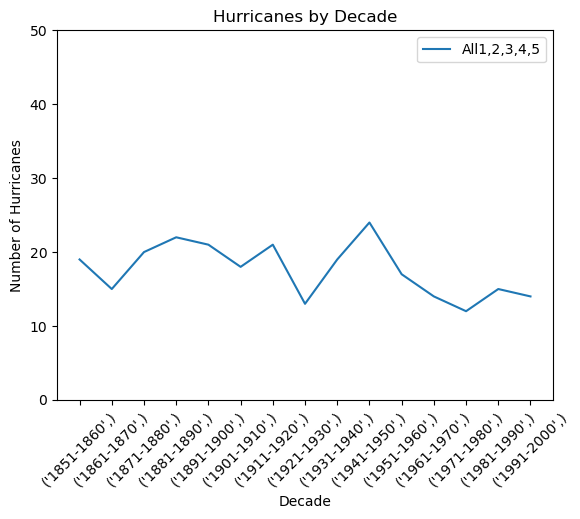

In [104]:
import matplotlib.pyplot as plt


plt.figure(figsize=(50, 6)) # set width to 12 inches, height to 6 inches



# select the All1,2,3,4,5 column and plot the line graph
df['All1,2,3,4,5'].plot(kind='line')

# set the title and axis labels
plt.title('Hurricanes by Decade')
plt.xlabel('Decade')
plt.xticks(range(len(df.index)), df.index.tolist(), rotation=45)
plt.ylabel('Number of Hurricanes')
plt.ylim(0,50)

# display the plot
plt.show()

### PART 2

In [107]:
import requests
from bs4 import BeautifulSoup

url = 'https://flightaware.com/live/flight/AAL481/history'
fl_page = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}) # Get the page.
soup = BeautifulSoup(fl_page.text, 'html.parser')

# Save the page to disk.
with open(r"C:\Users\tyj85\OneDrive\Desktop\UPenn\School\Stat 410\HW4\flight_page.html", "w", encoding='utf-8') as file:
    file.write(str(soup))   


In [108]:
with open(r"C:\Users\tyj85\OneDrive\Desktop\UPenn\School\Stat 410\HW4\flight_page.html", 'r', encoding='utf-8') as f:
    contents = f.read()
    soup = BeautifulSoup(contents, 'html.parser')  

In [119]:
tables = soup.findAll('table')

In [116]:
soup.table

In [170]:
dfs = list() # A list to hold the data frames.
for table in tables:
    table.attrs.clear() # This clears the table attributes.
    df = pd.read_html(str(table))[0] # Now pandas works!
    # print(df.info())
    dfs.append(df) 

In [171]:
true_df = dfs[3]

In [198]:
flight_df = true_df[2:15]
flight_df

,Date,Aircraft,Origin,Destination,Departure,Arrival,Duration
2,26-Apr-2023,A21N,Los Angeles Intl (KLAX),Philadelphia Intl (KPHL),03:45PM PDT,11:29PM EDT,4:43
3,25-Apr-2023,A21N,Los Angeles Intl (KLAX),Philadelphia Intl (KPHL),03:51PM PDT,11:19PM EDT,4:28
4,24-Apr-2023,A21N,Los Angeles Intl (KLAX),Philadelphia Intl (KPHL),03:48PM PDT,11:22PM EDT,4:33
5,23-Apr-2023,A21N,Los Angeles Intl (KLAX),Philadelphia Intl (KPHL),03:40PM PDT,11:03PM EDT,4:22
6,22-Apr-2023,A21N,Los Angeles Intl (KLAX),Philadelphia Intl (KPHL),03:36PM PDT,11:03PM EDT,4:26
7,21-Apr-2023,A21N,Los Angeles Intl (KLAX),Philadelphia Intl (KPHL),03:42PM PDT,11:13PM EDT,4:30
8,20-Apr-2023,A21N,Los Angeles Intl (KLAX),Philadelphia Intl (KPHL),03:40PM PDT,11:34PM EDT,4:54
9,19-Apr-2023,A21N,Los Angeles Intl (KLAX),Philadelphia Intl (KPHL),03:43PM PDT,11:10PM EDT,4:27
10,18-Apr-2023,A21N,Los Angeles Intl (KLAX),Philadelphia Intl (KPHL),03:36PM PDT,11:01PM EDT,4:24
11,16-Apr-2023,A21N,Los Angeles Intl (KLAX),Philadelphia Intl (KPHL),03:46PM PDT,11:34PM EDT,4:48


In [199]:
flight_stat = pd.to_datetime(flight_df['Duration'], format="%H:%M").dt.hour * 60 + pd.to_datetime(flight_df['Duration'], format="%H:%M").dt.minute

In [195]:
flight_stat.describe()

count     13.000000
mean     276.538462
std       11.140133
min      262.000000
25%      267.000000
50%      273.000000
75%      287.000000
max      294.000000
Name: Duration, dtype: float64

### PART 3

In [200]:
import requests
from bs4 import BeautifulSoup

url = 'http://wsj.com'
wsj_page = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}) # Get the page.
soup = BeautifulSoup(wsj_page.text, 'html.parser')

# Save the page to disk.
with open(r"C:\Users\tyj85\OneDrive\Desktop\UPenn\School\Stat 410\HW4\wsj_page.html", "w", encoding='utf-8') as file:
    file.write(str(soup))   

In [203]:
with open(r"C:\Users\tyj85\OneDrive\Desktop\UPenn\School\Stat 410\HW4\wsj_page.html", 'r', encoding='utf-8') as f:
    contents = f.read()
    soup = BeautifulSoup(contents, 'html.parser')  

In [214]:
#aside = soup.find('aside', id='most-popular-articles')

In [215]:
soup.aside

<aside class="" id="most-popular-articles" tabindex="-1"><span class="style--strap--ND8Cuaip style--align-left--3iZ8c-pm" style="display:block"><h2 class="style--label--13MlcFOP typography--sans-serif-narrow--tQEgavy2 style--size-small--1mrJTuBn style--icon-position-right--Sm9pTJ3p style--popular--1tPwo3ys style--padding-top-12--3XU8PlhY style--padding-bottom-12--393Wqqzy"><span class="">Most Popular News</span><span class="style--icon--1WxxxS-r style--icon-position-right--Sm9pTJ3p"></span></h2></span><ol class="WSJTheme--list-reset--3pR-r52l"><li class="WSJTheme--popular--3OI9isfz"><a class="WSJTheme--link--c8R_c_Vx" href="https://www.wsj.com/articles/retirement-in-alabama-b59c55b3?mod=hp_trending_now_article_pos1"><div class="WSJTheme--text--2yLVyzUM"><div class="WSJTheme--headline-container--3LSmGuih"><h3 class="WSJTheme--headline--nQ8J-FfZ">Priced Out of Florida, More Retirees Are Trying This Sunbelt State on For Size</h3></div></div><div class="WSJTheme--thumb--DOohBjR2"><div clas

In [216]:
poi = soup.aside

In [217]:
for h3 in poi.find_all('h3'):
    print(h3.text)

Priced Out of Florida, More Retirees Are Trying This Sunbelt State on For Size
Fire Sale: $300 Million San Francisco Office Tower, Mostly Empty. Open to Offers.
Tucker Carlson Speaks Out in Twitter Video Two Days After Ouster From Fox News
GDP Report Shows Economic Growth Slowed in First Quarter
Carlson’s Vulgar Messages About Colleagues Helped Seal His Fate


### PART 4

In [218]:
import requests
from bs4 import BeautifulSoup

url = 'https://philly.eater.com/maps/38-best-philadelphia-restaurants'
pr_page = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}) # Get the page.
soup = BeautifulSoup(pr_page.text, 'html.parser')

# Save the page to disk.
with open(r"C:\Users\tyj85\OneDrive\Desktop\UPenn\School\Stat 410\HW4\philly_res_page.html", "w", encoding='utf-8') as file:
    file.write(str(soup))   

In [318]:
with open(r"C:\Users\tyj85\OneDrive\Desktop\UPenn\School\Stat 410\HW4\philly_res_page.html", 'r', encoding='utf-8') as f:
    contents = f.read()
    soup = BeautifulSoup(contents, 'html.parser')  
    

In [319]:
main = soup.find('main')

In [320]:
for h1 in main.find_all('h1'):
    print(h1.text)

The 38 Essential Restaurants in Philadelphia
Jamaican D's Caribbean & American Restaurant
Kim's Restaurant
White Yak
Dalessandro's Steaks
Càphê Roasters
Down North Pizza
Sor Ynez
Kalaya
Eeva
Middle Child Clubhouse
South
Vernick Fish
Dim Sum Garden
Jezabel’s
Abyssinia
Tambayan
Honeysuckle Provisions
Amma's South Indian Cuisine
Her Place Supper Club
High Street Philly
Friday Saturday Sunday
Zahav
Puyero Venezuelan Flavor
Le Caveau
Ambra
Royal Izakaya
Pho 75
El Mezcal Cantina
South Philly Barbacoa
River Twice
Hardena 
Korshak Bagels
Gabriella's Vietnam
Juana Tamale
Irwin's
Machine Shop Boulangerie
Zeppoli
Southeast Asian Market


In [253]:
#c_data = soup.find('main', id='content')

In [315]:
# res_names = []
# for sec in c_data.find_all('section'):
#     if sec['data-slug'] in ['related-links', 'intro', 'newsletter']:
#         continue
#     else:
#         res_names.append(sec['data-slug'])

In [321]:
# res_names